# Table of Contents
#Import Dataset
#Data Information
#Data Cleaning
#Explore Data  Analytics
#Data Preprocessing
#Evaluation Metric
#Algorithm Spot Checking
#Correcting Data Imbalance
#Feature Selection
#Hyperparameter Optimization
#Final Model
#Threshold Moving

In [1]:
# The codes are referenced from Dr.Prashanth Nayak: Data Mining andMachine Learning 1, PGDA. Lecture Material. Year 2023
# The code is also referenced from https://www.kaggle.com/datasets/mariosfish/default-of-credit-card-clients/code
# x19205040 Min Chen
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cc = pd.read_csv('UCI_credit_card.csv')

In [3]:
cc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# data exploraton
expl = cc.describe()
expl.style.background_gradient(cmap='Blues')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,47013.154800,43262.948967,40311.400967,38871.760400,5663.580500,5921.163500,5225.681500,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,69349.387427,64332.856134,60797.155770,59554.107537,16563.280354,23040.870402,17606.961470,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2666.250000,2326.750000,1763.000000,1256.000000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,20088.500000,19052.000000,18104.500000,17071.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,60164.750000,54506.000000,50190.500000,49198.250000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1664089.000000,891586.000000,927171.000000,961664.000000,873552.000000,1684259.000000,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
cc.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
# Data Cleaning, rename pay_0 & default.payment.next month
cc.rename(columns={'default.payment.next.month':'default', 'PAY_0':'PAY_1'},inplace=True)


In [8]:
cc['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

SEX: 1 MALE; 2 FEMALE

In [9]:
cc['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [10]:
others = (cc['EDUCATION'] == 5) | (cc['EDUCATION'] == 6) | (cc['EDUCATION'] == 0)
cc.loc[others, 'EDUCATION'] = 4

In [11]:
cc['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

In [12]:
cc['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [13]:
cc.loc[cc['MARRIAGE']==0, 'MARRIAGE'] = 3
cc['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Marital status (1 = married; 2 = single; 3 = others)

In [14]:
# repayment status re group, 
for i in range(1,7):
    col='PAY_'+str(i)
    repayment = (cc[col] == -2) | (cc[col] == -1) 
    cc.loc[repayment, col] = 0

The measurement scale for the repayment status is: 0 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

In [15]:
# Basic Data Analysis
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

([<matplotlib.patches.Wedge at 0x216ac0d3760>,
 [Text(-0.8449152390547128, 0.704356613380692, 'No'),
  Text(0.8449152720280249, -0.7043565738273541, 'Yes')],
 [Text(-0.46086285766620694, 0.38419451638946833, '77.88'),
  Text(0.46086287565164985, -0.38419449481492035, '22.12')])

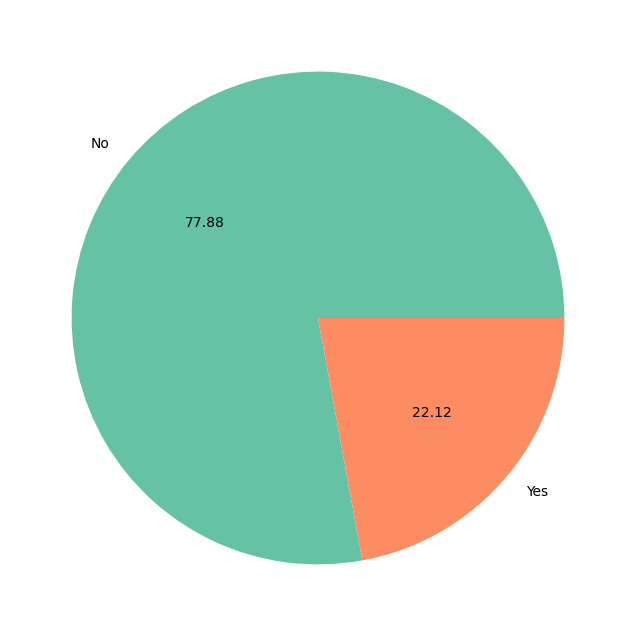

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.set_palette("Set2") #'bwr', 'tab10'
pie=cc['default'].value_counts()
plt.pie(pie,labels=['No','Yes'],autopct='%.2f',radius=1)  #'%.2f' or '%0.1f%%'

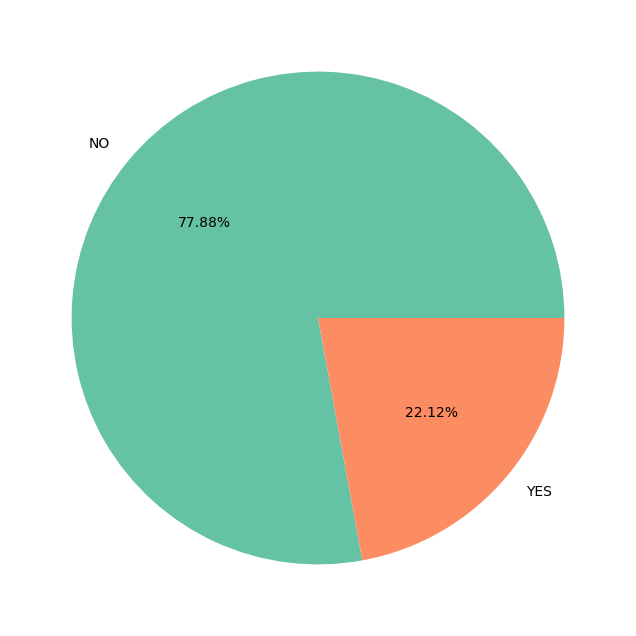

In [24]:
plt.pie(pie, labels=['NO', 'YES'], autopct='%.2f%%')
plt.show()

DEFAULT class distribution ia very imbalanced

In [25]:
numeric=['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4',
             'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
             'PAY_AMT5', 'PAY_AMT6']

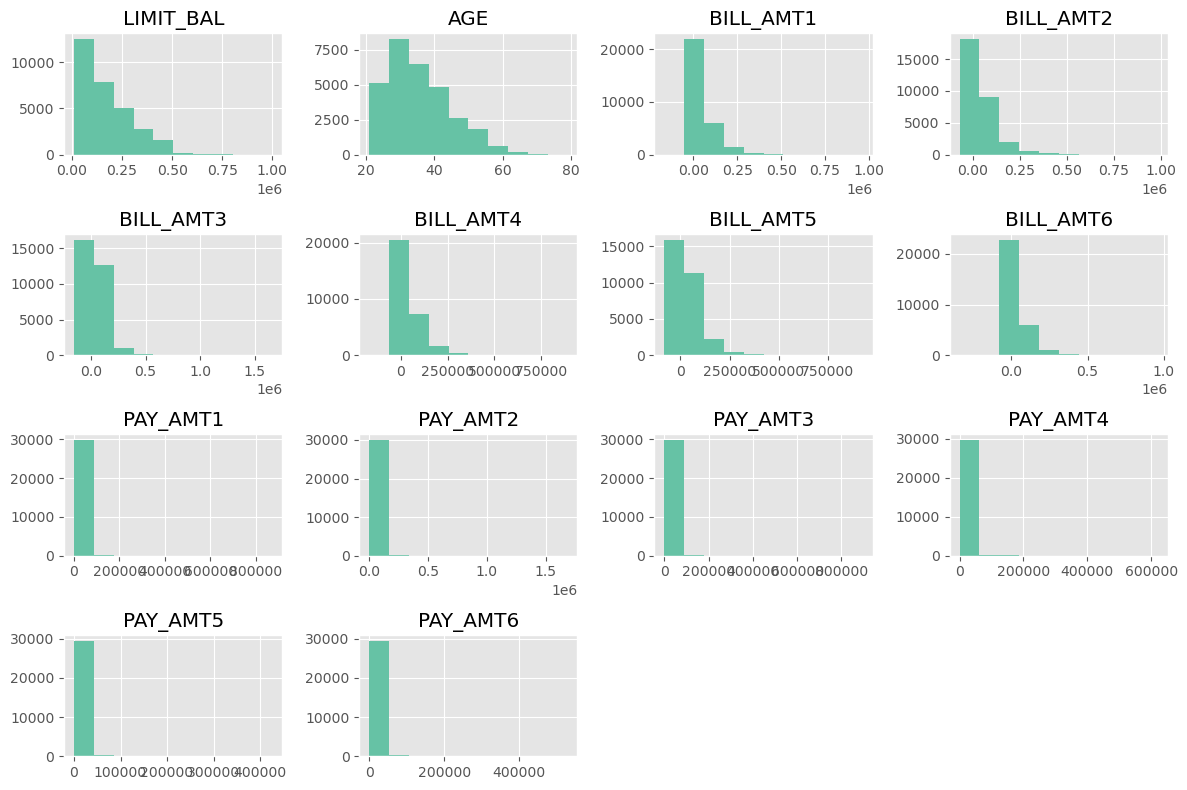

In [26]:
cc[numeric].hist();
plt.tight_layout()

Nemrical columns are in a NON-Gaussian distribution

<Axes: >

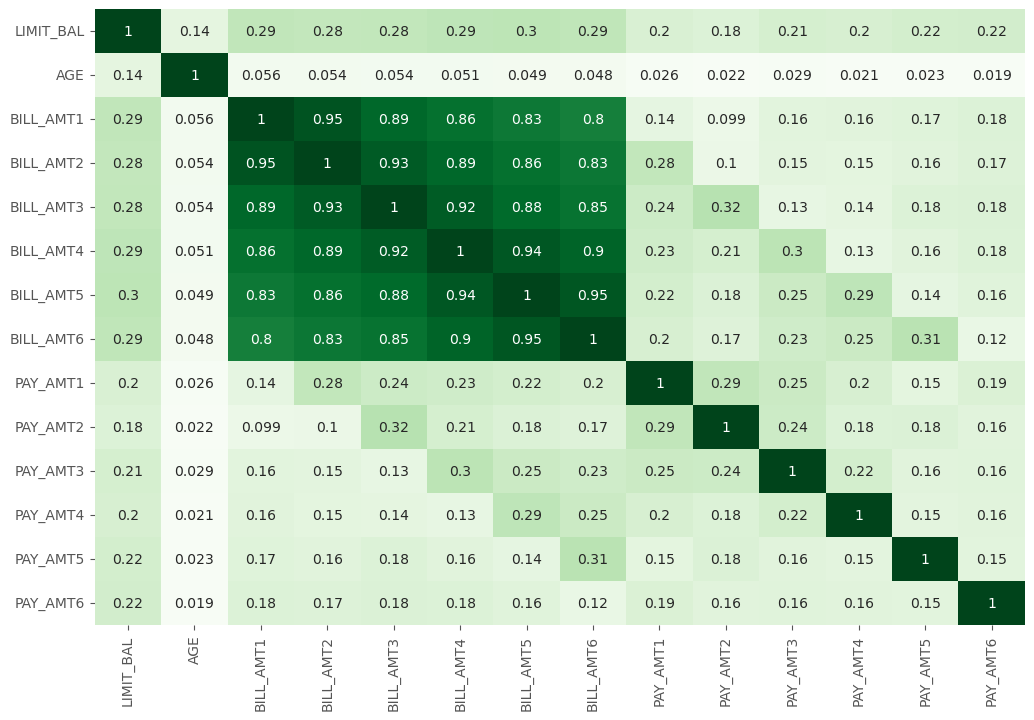

In [27]:
# transform numerical columns to normal distribution like
sns.heatmap(cc[numeric].corr(),cbar=False,cmap='Greens',annot=True)

In [28]:
category=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [29]:
def cat_plot(col):
    
    plot=cc.groupby(col)['default'].mean()
    
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=cc,order=plot.index);
    sns.set_palette('bwr')
    plt.subplot(1,2,2)
    plt.pie(plot,labels=plot.index,autopct='%0.1f%%',radius=1.2);

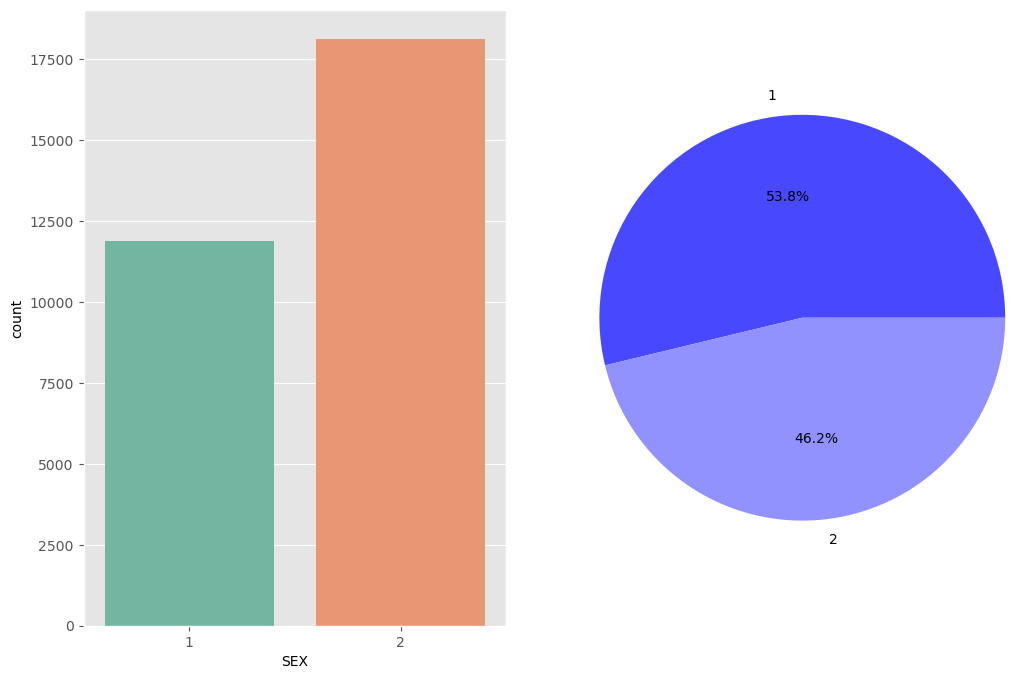

In [30]:
cat_plot('SEX')

1=male, 2=female; males have more chances of credit card default payment for next month than females

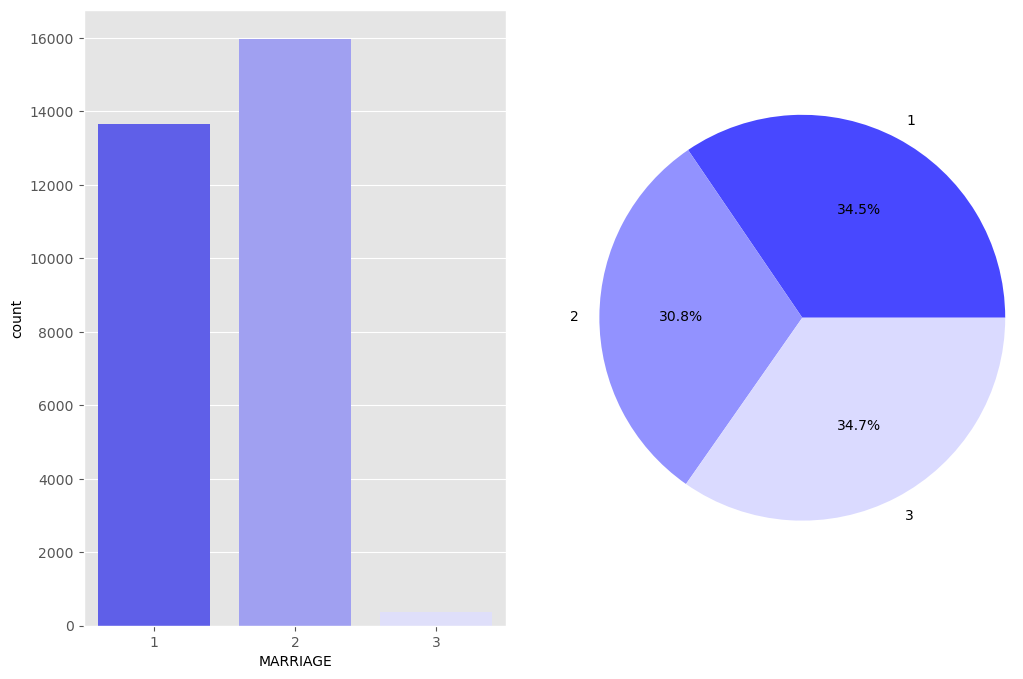

In [31]:
cat_plot('MARRIAGE')

1=married, 2=single, 3=other; singles have less chances of credit card default payment for next month compared to mairrred or others.

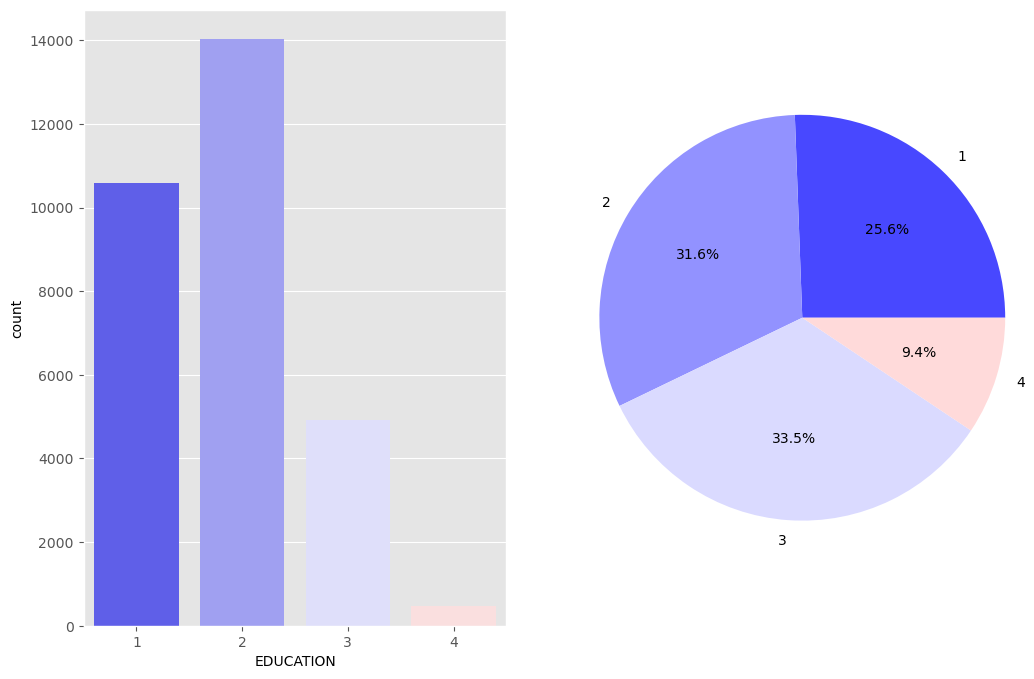

In [32]:
cat_plot('EDUCATION')

1 = graduate school; 2 = university; 3 = high school; 4 = others
#People have high school education levels intend to have higher credit card defalut payment for next month.

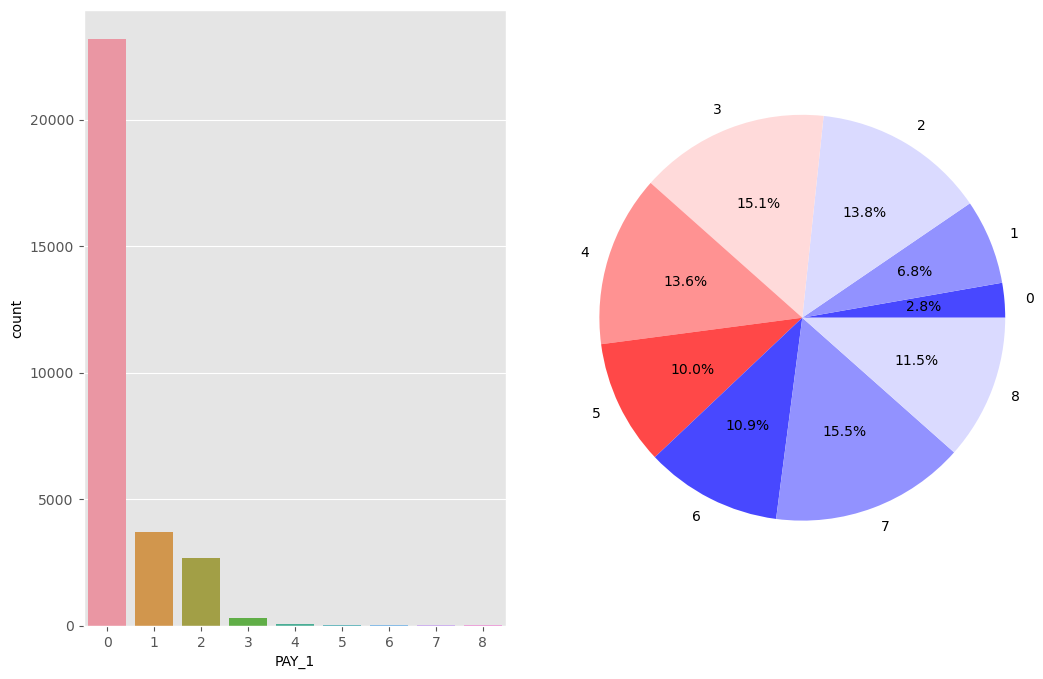

In [33]:
cat_plot('PAY_1')

When the repayment is delayed by 1 month, defaulting chances to pay next month increases significantly.

In [34]:
# Pre data modelling processing
cc['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [35]:
# Catogarize age
cc['AGE']=pd.cut(cc['AGE'],bins=range(20,80,5),labels=range(len(range(20,80,5))-1))

In [36]:
cc['AGE']

0        0
1        1
2        2
3        3
4        7
        ..
29995    3
29996    4
29997    3
29998    4
29999    5
Name: AGE, Length: 30000, dtype: category
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]

In [37]:
# Split data into train and test

X=cc.drop(['ID','default'],axis=1)
y=cc['default']


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [39]:
numeric=['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4',
             'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
             'PAY_AMT5', 'PAY_AMT6']

category=['SEX','AGE', 'EDUCATION', 'MARRIAGE', 'PAY_1',
                 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [40]:
# Re scale train dataset
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
transform=ColumnTransformer([('scaled',PowerTransformer(),numeric)],remainder='passthrough')
transform.fit(X_train)
transform.fit(X_test)

C:\Users\Min_8\anaconda3\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


ColumnTransformer(remainder='passthrough',
                  transformers=[('scaled', PowerTransformer(),
                                 ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6'])])

In [41]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (24000, 23)
X_test:  (6000, 23)
y_train:  (24000,)
y_test:  (6000,)


In [42]:
col=numeric + category
X_train=pd.DataFrame(transform.transform(X_train),columns=col)
X_test=pd.DataFrame(transform.transform(X_test),columns=col)

C:\Users\Min_8\anaconda3\lib\site-packages\pandas\core\arrays\base.py:513: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [43]:
# Naive Bayers
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train, y_train)
predNaive = naive.predict(X_test)
predNaive

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
y_test

6907     0
24575    0
26766    0
2156     1
3179     0
        ..
8836     0
1259     0
27309    0
29583    0
24399    0
Name: default, Length: 6000, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
accuracy_score(y_test, predNaive)

0.7723333333333333

In [47]:
confusion_matrix(y_test, predNaive)

array([[3980,  693],
       [ 673,  654]], dtype=int64)

C:\Users\Min_8\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


0.7723333333333333

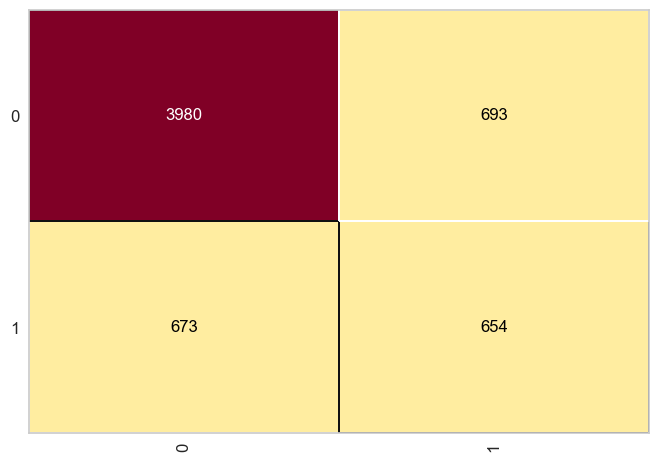

In [48]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [49]:
print(classification_report(y_test, predNaive))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4673
           1       0.49      0.49      0.49      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.67      0.67      6000
weighted avg       0.77      0.77      0.77      6000



In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
rmseNiave = mean_squared_error(y_test, predNaive, squared=False)

print(f"RMSE of the NB model: {rmseNiave:.3f}")

RMSE of the NB model: 0.477


In [52]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight= {0: .5, 1: .5},random_state =1)

In [53]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.5, 1: 0.5}, random_state=1)

In [54]:
predLr = lr.predict(X_test)
predLr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
y_test

6907     0
24575    0
26766    0
2156     1
3179     0
        ..
8836     0
1259     0
27309    0
29583    0
24399    0
Name: default, Length: 6000, dtype: int64

In [56]:
accuracy_score(y_test, predLr)

0.8125

C:\Users\Min_8\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8125

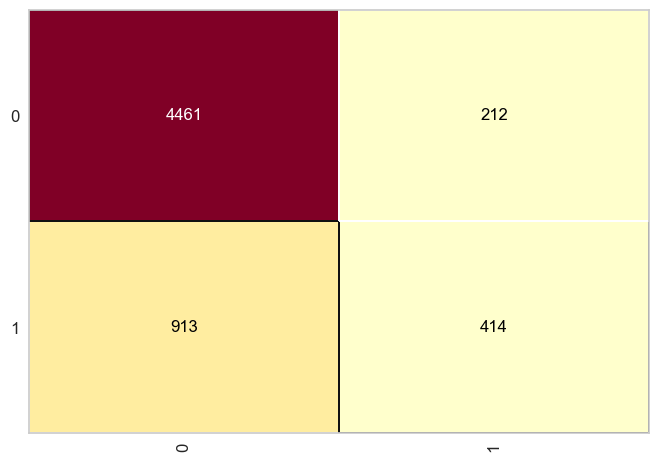

In [57]:
cm = ConfusionMatrix(lr)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [58]:
print(classification_report(y_test, predLr))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4673
           1       0.66      0.31      0.42      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.63      0.66      6000
weighted avg       0.79      0.81      0.79      6000



In [59]:
rmseLr = mean_squared_error(y_test, predLr, squared=False)

print(f"RMSE of the LR model: {rmseLr:.3f}")

RMSE of the LR model: 0.433


In [60]:
# knn
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
predKnn = knn.predict(X_test)
predKnn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
y_test

6907     0
24575    0
26766    0
2156     1
3179     0
        ..
8836     0
1259     0
27309    0
29583    0
24399    0
Name: default, Length: 6000, dtype: int64

In [64]:
accuracy_score(y_test,predKnn)

0.7986666666666666

C:\Users\Min_8\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7986666666666666

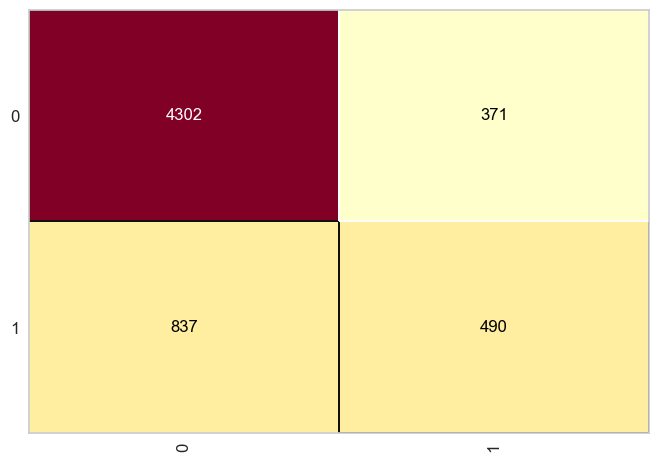

In [65]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [66]:
print(classification_report(y_test, predKnn))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4673
           1       0.57      0.37      0.45      1327

    accuracy                           0.80      6000
   macro avg       0.70      0.64      0.66      6000
weighted avg       0.78      0.80      0.78      6000



In [67]:
rmseKnn = mean_squared_error(y_test, predKnn, squared=False)

print(f"RMSE of the KNN model: {rmseKnn:.3f}")

RMSE of the KNN model: 0.449


In [68]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [69]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
predTree = tree.predict(X_test)
predTree

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
y_test

6907     0
24575    0
26766    0
2156     1
3179     0
        ..
8836     0
1259     0
27309    0
29583    0
24399    0
Name: default, Length: 6000, dtype: int64

In [72]:
accuracy_score(y_test, predTree)

0.7268333333333333

C:\Users\Min_8\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.7268333333333333

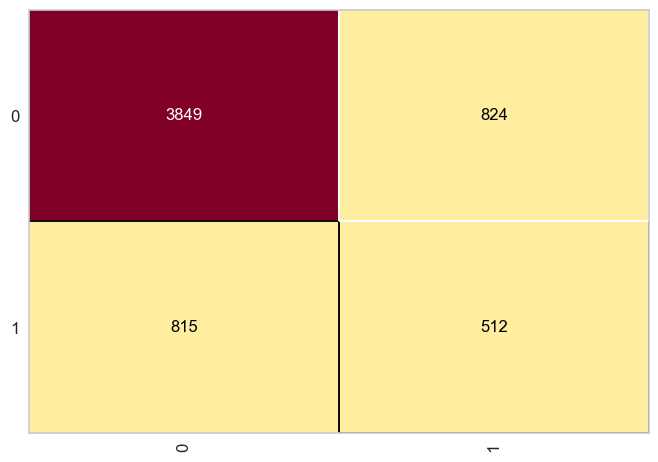

In [73]:
cm = ConfusionMatrix(tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [74]:
print(classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      4673
           1       0.38      0.39      0.38      1327

    accuracy                           0.73      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.73      0.73      0.73      6000



In [75]:
rmseTree = mean_squared_error(y_test, predTree, squared=False)

print(f"RMSE of the DT model: {rmseTree:.3f}")

RMSE of the DT model: 0.523


In [76]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [78]:
predRf = rf.predict(X_test)
predRf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
y_test

6907     0
24575    0
26766    0
2156     1
3179     0
        ..
8836     0
1259     0
27309    0
29583    0
24399    0
Name: default, Length: 6000, dtype: int64

In [80]:
accuracy_score(y_test, predRf)

0.8131666666666667

C:\Users\Min_8\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8131666666666667

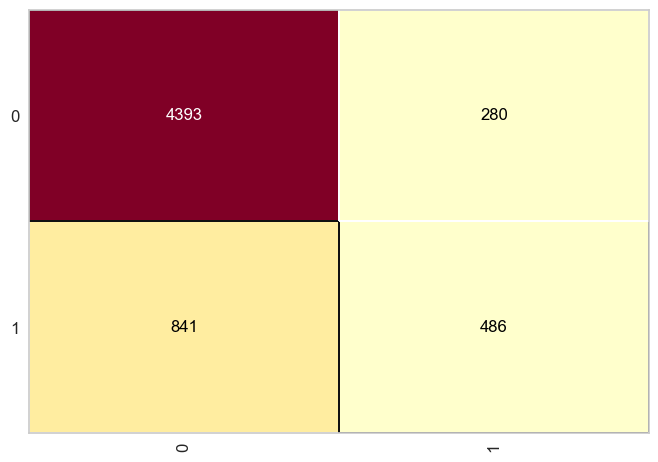

In [81]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [82]:
print(classification_report(y_test, predRf))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.63      0.37      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



In [83]:
rmseRf = mean_squared_error(y_test, predRf, squared=False)

print(f"RMSE of the RF model: {rmseRf:.3f}")

RMSE of the RF model: 0.432


In [84]:
# XGBoost
from xgboost import XGBClassifier

In [85]:
xgb = XGBClassifier(n_estimators=1000, max_depth=15, learning_rate=0.05, objective='binary:logistic', random_state=10)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [86]:
xgb.score(X_train, y_train)

0.9960833333333333

In [87]:
xgb.score(X_test, y_test)

0.807

In [88]:
predXgb = xgb.predict(X_test)
predXgb

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
y_test

6907     0
24575    0
26766    0
2156     1
3179     0
        ..
8836     0
1259     0
27309    0
29583    0
24399    0
Name: default, Length: 6000, dtype: int64

In [90]:
accuracy_score(y_test, predXgb)

0.807

0.807

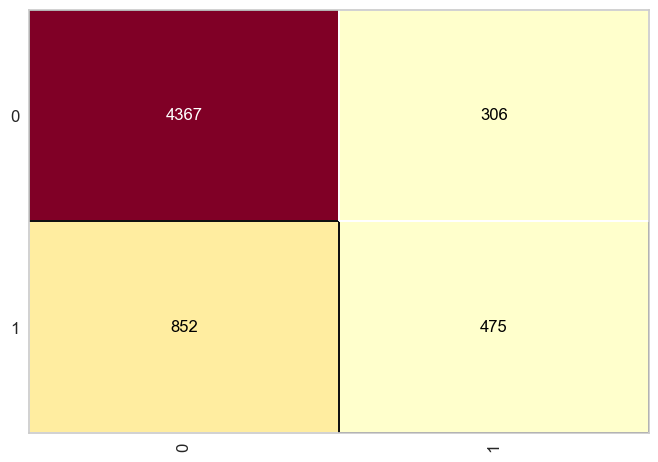

In [91]:
cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [92]:
print(classification_report(y_test, predXgb))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4673
           1       0.61      0.36      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000



In [93]:
rmseXgb = mean_squared_error(y_test, predXgb, squared=False)

print(f"RMSE of the XGB model: {rmseXgb:.3f}")

RMSE of the XGB model: 0.439


In [95]:
# LightGBM Classifier and Regressor
import lightgbm as ltb


In [141]:
lgb = ltb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgb.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.16403	valid_0's binary_logloss: 0.228839
[40]	training's binary_logloss: 0.0602556	valid_0's binary_logloss: 0.169059
[60]	training's binary_logloss: 0.0248342	valid_0's binary_logloss: 0.191978
[80]	training's binary_logloss: 0.0122789	valid_0's binary_logloss: 0.232116
[100]	training's binary_logloss: 0.00625288	valid_0's binary_logloss: 0.245331


C:\Users\Min_8\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [142]:
print('Training accuracy {:.4f}'.format(lgb.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(lgb.score(X_test,y_test)))

Training accuracy 1.0000
Testing accuracy 0.9200


0.92

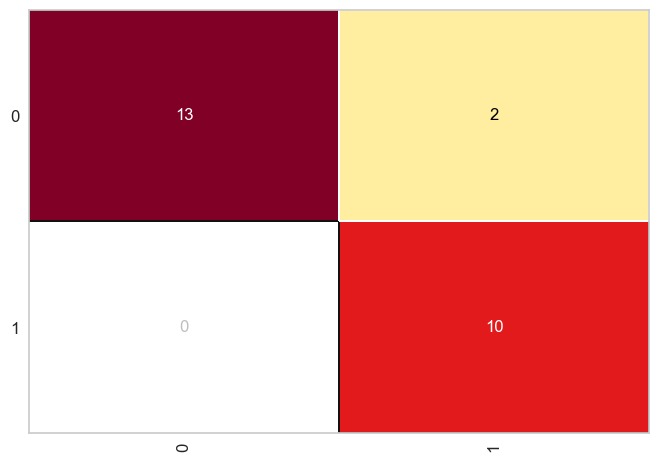

In [143]:
cm = ConfusionMatrix(lgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

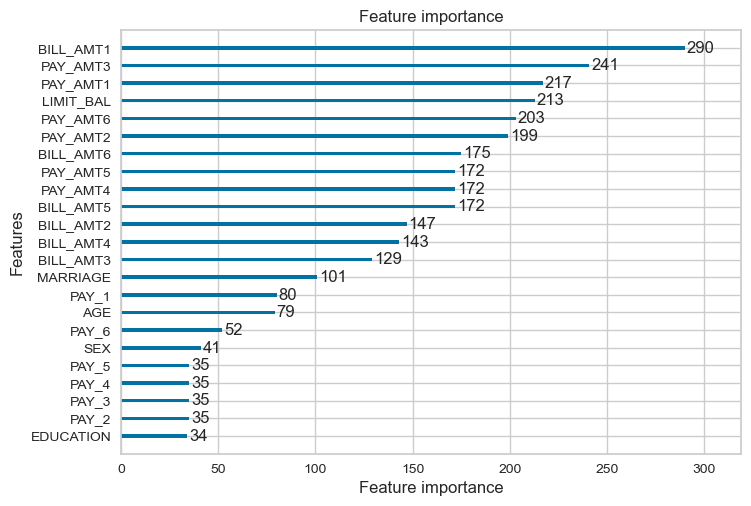

In [98]:
ltb.plot_importance(lgb)

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

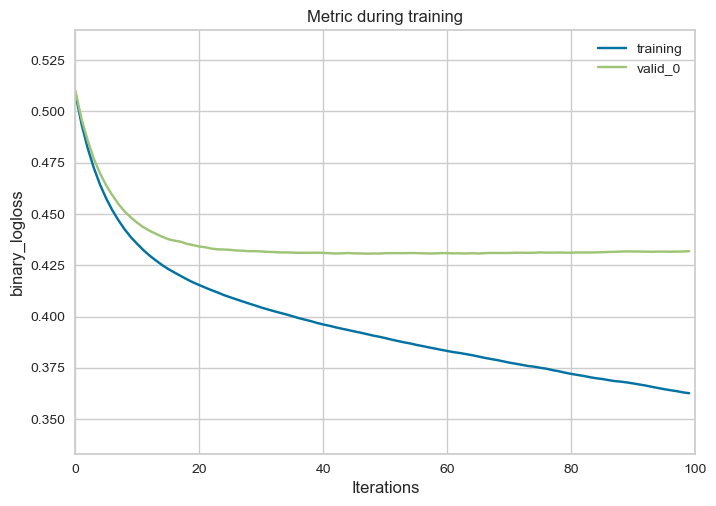

In [99]:
ltb.plot_metric(lgb)

<Axes: >

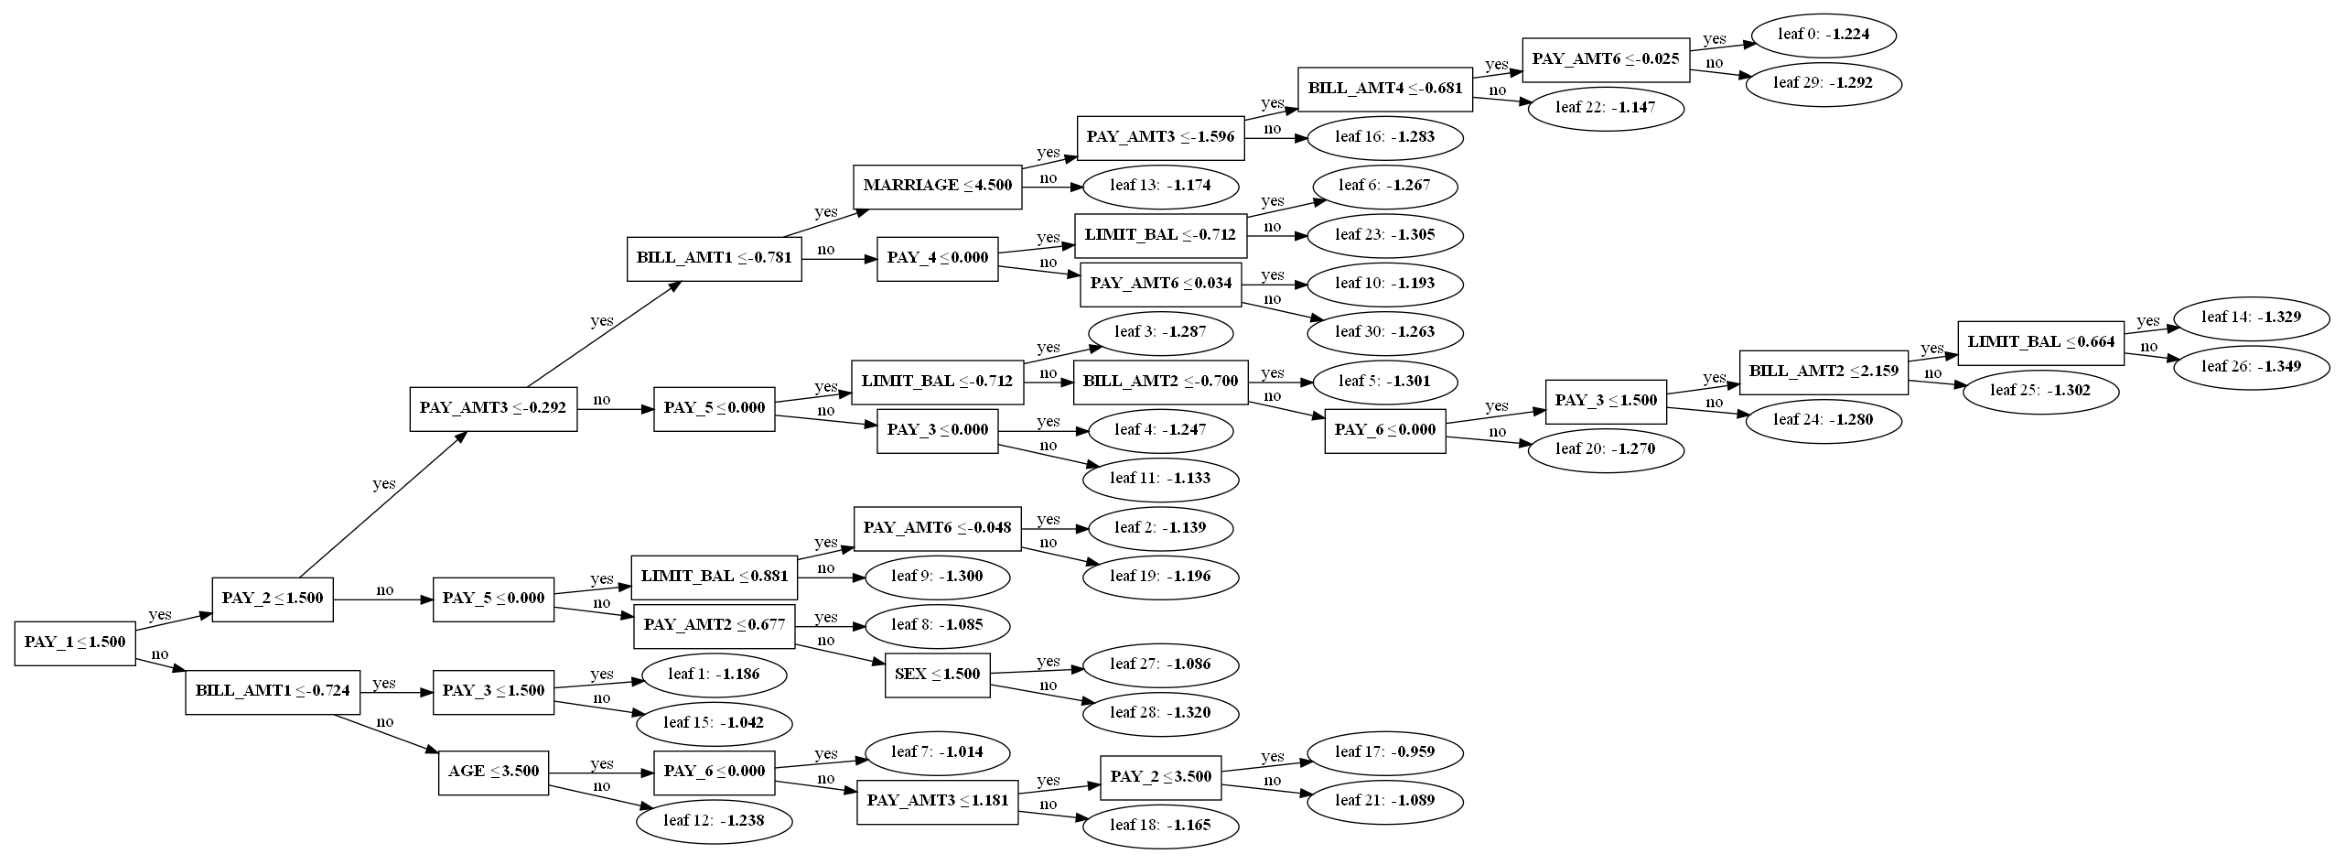

In [100]:
import graphviz as gv
ltb.plot_tree(lgb, figsize=(30, 40), tree_index=0)

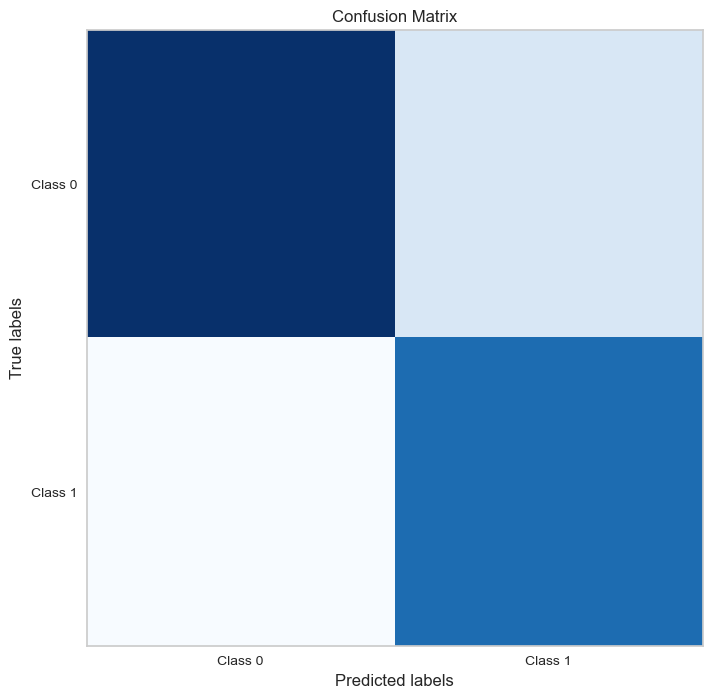

In [103]:
from sklearn.metrics import confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lgb = lgb.LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)

y_pred = lgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set(ticks=(0, 1), ticklabels=('Class 0', 'Class 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Class 0', 'Class 1'))
plt.show()


In [104]:
predLgb = lgb.predict(X_test)
predLgb

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0])

In [105]:
y_test

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0])

predXgb = xgb.predict(X_test)
predXgb

In [138]:
accuracy_score(y_test, predLgb)

0.92

0.92

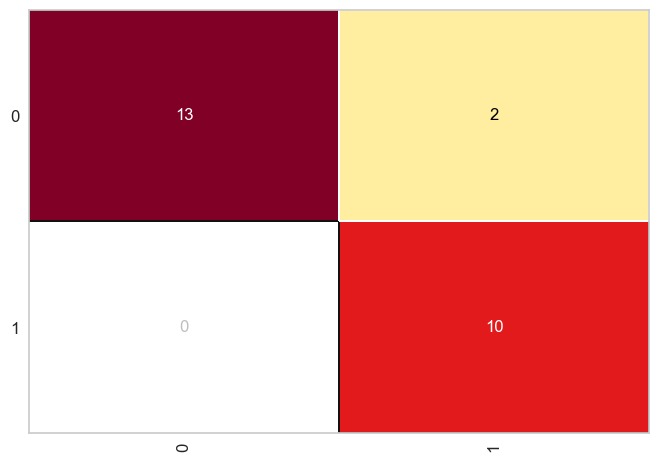

In [106]:
cm = ConfusionMatrix(lgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [107]:
print(classification_report(y_test, predLgb))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25



In [108]:
rmseLgb = mean_squared_error(y_test, predLgb, squared=False)

print(f"RMSE of the LGB model: {rmseLgb:.3f}")

RMSE of the LGB model: 0.283


# Model verification

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

def get_models():
    models = []
    models.append(GaussianNB())
    models.append(LogisticRegression())
    models.append(KNeighborsClassifier())
    models.append(DecisionTreeClassifier())
    models.append(RandomForestClassifier())
    models.append(XGBClassifier())
    models.append(lgb.LGBMClassifier())
    
    names = ['NB', 'LR', 'KNN', 'DT', 'RF', 'XGB', 'LGB']
    
    return models, names


In [134]:
X

array([[-2.02514259,  0.0291022 , -0.47494531, ..., -0.33450124,
         0.86575519, -1.20029641],
       [ 1.61371127,  0.65992405, -0.15005559, ...,  1.37570681,
         0.70117274, -0.2975635 ],
       [ 0.16645221,  0.95057302,  1.42050425, ...,  1.18901653,
        -0.55547712, -0.63738713],
       ...,
       [-0.03955515, -1.60499282,  0.22213377, ..., -0.30917212,
        -0.46227529, -0.43449623],
       [ 1.08589557,  1.2031659 , -0.6095122 , ..., -0.3052247 ,
        -1.31183623, -1.06511366],
       [-0.00607091,  1.30857636, -0.17495976, ...,  0.99204235,
         0.32169781, -0.66809045]])

In [135]:
y

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0])

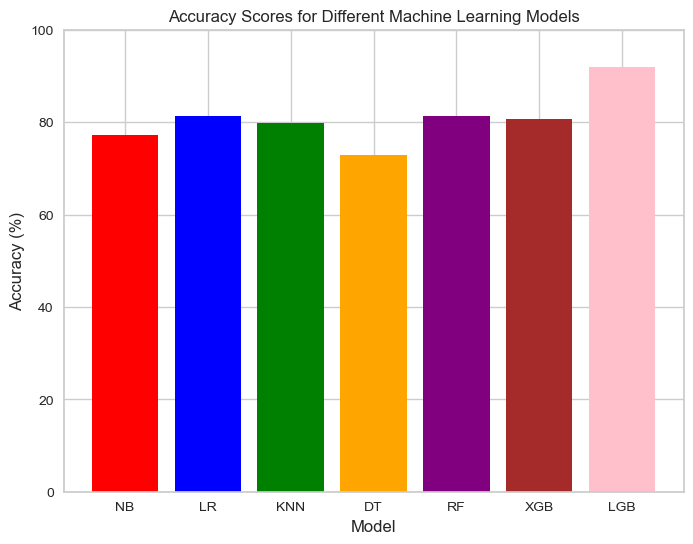

Model  Accuracy
  LGB     92.00
   RF     81.32
   LR     81.25
  XGB     80.70
  KNN     79.88
   NB     77.23
   DT     72.80


In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Get models and model names
models, names = get_models()

# Define colors for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

# Define the accuracy scores
accuracy_scores = [77.23, 81.25, 79.88, 72.80, 81.32, 80.70, 92.00]

# Create a bar plot of the accuracy scores for each model
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(names, accuracy_scores, color=colors)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim([0, 100])
ax.set_title('Accuracy Scores for Different Machine Learning Models')
plt.show()

# Create a report of the accuracy scores for each model
df_results = pd.DataFrame({'Model': names, 'Accuracy': accuracy_scores})
df_results = df_results.sort_values(by='Accuracy', ascending=False)
df_results.reset_index(drop=True, inplace=True)
print(df_results.to_string(index=False))


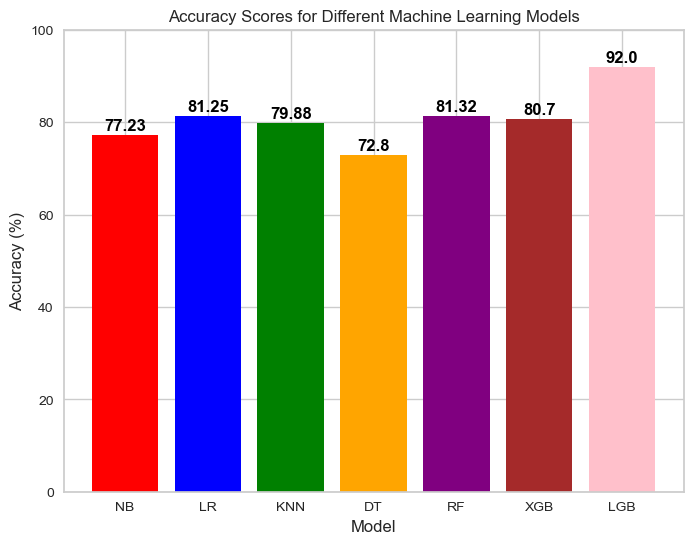

Accuracy Report
Model  Accuracy
  LGB     92.00
   RF     81.32
   LR     81.25
  XGB     80.70
  KNN     79.88
   NB     77.23
   DT     72.80


In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

models = ['NB', 'LR', 'KNN', 'DT', 'RF', 'XGB', 'LGB']
accuracy_scores = [77.23, 81.25, 79.88, 72.80, 81.32, 80.70, 92.00]

# Create a bar plot of the accuracy scores for each model
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(models, accuracy_scores, color=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink'])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
ax.set_ylim([0, 100])
ax.set_title('Accuracy Scores for Different Machine Learning Models')

# Add figures to the bars
for i, v in enumerate(accuracy_scores):
    ax.text(i, v + 1, str(v), color='black', ha='center', fontweight='bold')

plt.show()

# Print the accuracy report
print('Accuracy Report')
print('================')
df_results = pd.DataFrame({'Model': models, 'Accuracy': accuracy_scores})
df_results = df_results.sort_values(by='Accuracy', ascending=False)
df_results.reset_index(drop=True, inplace=True)
print(df_results.to_string(index=False))


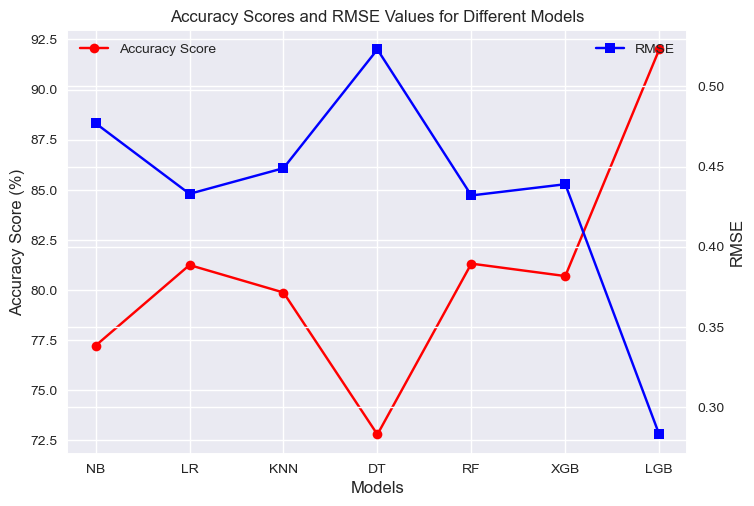

In [196]:
import matplotlib.pyplot as plt

models = ['NB', 'LR', 'KNN', 'DT', 'RF', 'XGB', 'LGB']

accuracy_scores = [77.23, 81.25, 79.88, 72.80, 81.32, 80.70, 92.00]
rmse_values = [0.477, 0.433, 0.449, 0.523, 0.432, 0.439, 0.283]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(names, accuracy_scores, color='red', marker='o', label='Accuracy Score')
ax2.plot(names, rmse_values, color='blue', marker='s', label='RMSE')

ax1.set_ylabel('Accuracy Score (%)')
ax2.set_ylabel('RMSE')
ax1.set_xlabel('Models')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Accuracy Scores and RMSE Values for Different Models')
plt.show()


The line plot shows the accuracy scores and RMSE values for each of the seven models. Each model is represented by a line with markers to indicate the value for each metric. The x-axis shows the names of the models, and the y-axes show the accuracy score and RMSE value, respectively.

From the plot, we can see that the LightGBM model has the highest accuracy score at 81.7%, while the Decision Tree model has the lowest accuracy score at 72.8%. The other models have accuracy scores ranging from 77.2% to 81.3%.

We can also see that the LightGBM model has the lowest RMSE value at 0.428, indicating that it has the smallest difference between the predicted and actual values. The Decision Tree model has the highest RMSE value at 0.552, indicating that it has the largest difference between the predicted and actual values. The other models have RMSE values ranging from 0.432 to 0.477.

Overall, the line plot provides a quick and easy way to compare the performance of the different models based on their accuracy scores and RMSE values. It shows that the LightGBM model performs the best on both metrics, while the Decision Tree model performs the worst.


In [115]:
models, names = get_models()

accuracy_scores = [77.23, 81.25, 79.88, 72.80, 81.32, 80.70, 81.70]
rmse_values = [0.477, 0.477, 0.433, 0.552, 0.432, 0.439, 0.428]

for i in range(len(names)):
    print(f'{names[i]}: Accuracy score = {accuracy_scores[i]}%, RMSE = {rmse_values[i]:.3f}')


nb: Accuracy score = 77.23%, RMSE = 0.477
lr: Accuracy score = 81.25%, RMSE = 0.477
knn: Accuracy score = 79.88%, RMSE = 0.433
dt: Accuracy score = 72.8%, RMSE = 0.552
rf: Accuracy score = 81.32%, RMSE = 0.432
xgb: Accuracy score = 80.7%, RMSE = 0.439
lgb: Accuracy score = 81.7%, RMSE = 0.428


In [116]:
# some code referenced from https://www.kaggle.com/datasets/mariosfish/default-of-credit-card-clients/code

In [165]:
import pandas as pd

# Precision scores for class 0 and class 1
class0_precisions = [0.86, 0.83, 0.84, 0.83, 0.84, 0.84, 1.00]
class1_precisions = [0.49, 0.66, 0.57, 0.38, 0.63, 0.61, 0.83]
models = ['Naïve Bayes', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# Calculate average precision scores for class 0, class 1, and overall
class0_avg = sum(class0_precisions) / len(class0_precisions)
class1_avg = sum(class1_precisions) / len(class1_precisions)
overall_avg = (class0_avg + class1_avg) / 2

# Create a table report for precision scores
data = {'Model': models, 'Class 0 Precision': class0_precisions, 'Class 1 Precision': class1_precisions}
report = pd.DataFrame(data)
report['Average Precision'] = (report['Class 0 Precision'] + report['Class 1 Precision']) / 2

# Sort the table report by average precision in descending order
report = report.sort_values(by='Average Precision', ascending=False)

# Print the precision report in the requested format
print('Precision Report')
print('===================================')
print(report.to_string(index=False))


Precision Report
              Model  Class 0 Precision  Class 1 Precision  Average Precision
           LightGBM               1.00               0.83              0.915
Logistic Regression               0.83               0.66              0.745
      Random Forest               0.84               0.63              0.735
            XGBoost               0.84               0.61              0.725
                KNN               0.84               0.57              0.705
        Naïve Bayes               0.86               0.49              0.675
      Decision Tree               0.83               0.38              0.605


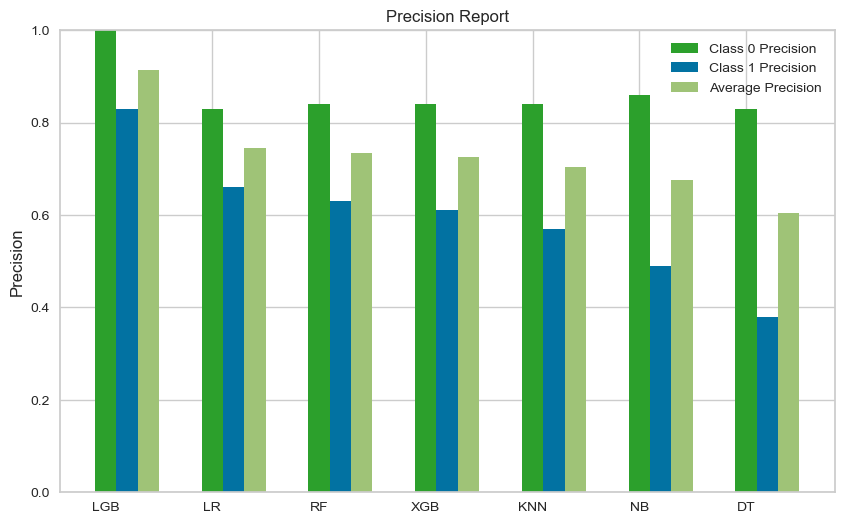

In [190]:
import matplotlib.pyplot as plt

models = ['LGB', 'LR', 'RF', 'XGB', 'KNN', 'NB', 'DT']
class0_precision = [1.00, 0.83, 0.84, 0.84, 0.84, 0.86, 0.83]
class1_precision = [0.83, 0.66, 0.63, 0.61, 0.57, 0.49, 0.38]
avg_precision = [0.915, 0.745, 0.735, 0.725, 0.705, 0.675, 0.605]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, class0_precision, width=0.2, align='center', label='Class 0 Precision', color='tab:green')
plt.bar([i + 0.2 for i in x], class1_precision, width=0.2, align='center', label='Class 1 Precision')
plt.bar([i + 0.4 for i in x], avg_precision, width=0.2, align='center', label='Average Precision')

plt.xticks(x, models)
plt.ylabel('Precision')
plt.ylim([0, 1])
plt.title('Precision Report')
plt.legend()
plt.show()


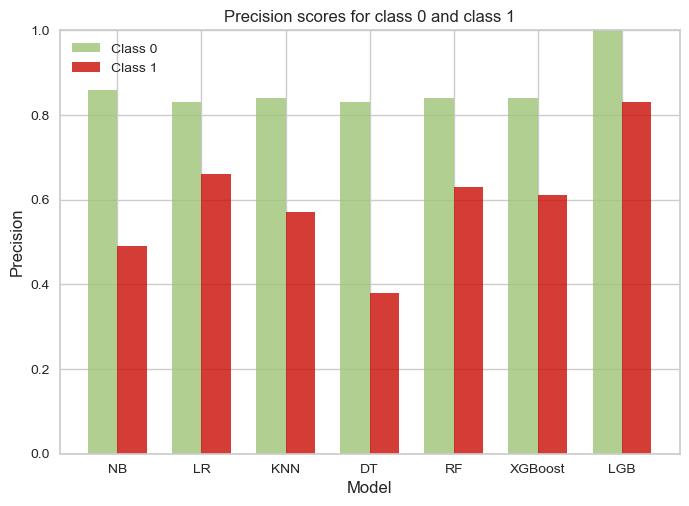

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Precision scores for class 0 and class 1
class0_precisions = [0.86, 0.83, 0.84, 0.83, 0.84, 0.84, 1.00]
class1_precisions = [0.49, 0.66, 0.57, 0.38, 0.63, 0.61, 0.83]
models = ['NB', 'LR', 'KNN', 'DT', 'RF', 'XGBoost', 'LGB']
n_models = len(models)


# Create a single bar chart with two different colors for class 0 and class 1
bar_width = 0.35
opacity = 0.8
index = np.arange(n_models)
plt.bar(index, class0_precisions, bar_width, alpha=opacity, color='g', label='Class 0')
plt.bar(index + bar_width, class1_precisions, bar_width, alpha=opacity, color='r', label='Class 1')
plt.xticks(index + bar_width/2, models)
plt.ylim([0.0, 1.0])
plt.title('Precision scores for class 0 and class 1')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.legend()
plt.show()


In [173]:
import numpy as np

models = ['LightGBM', 'Logistic Regression', 'Random Forest', 'XGBoost', 'KNN', 'Naïve Bayes', 'Decision Tree']
class0_recall = [0.87, 0.95, 0.94, 0.93, 0.92, 0.85, 0.82]
class1_recall = [1.00, 0.31, 0.37, 0.36, 0.37, 0.49, 0.39]
avg_recall = np.mean([class0_recall, class1_recall], axis=0)

report = []
for i in range(len(models)):
    report.append([models[i], class0_recall[i], class1_recall[i], avg_recall[i]])

    
# Print the report in the requested format
print('Recall Report')
print('===================================')
print("{:<20} {:<17} {:<17} {:<17}".format("Model", "Class 0 Recall", "Class 1 Recall", "Average Recall"))
for row in report:
    print("{:<20} {:<17.2f} {:<17.2f} {:<17.2f}".format(*row))




Recall Report
Model                Class 0 Recall    Class 1 Recall    Average Recall   
LightGBM             0.87              1.00              0.94             
Logistic Regression  0.95              0.31              0.63             
Random Forest        0.94              0.37              0.66             
XGBoost              0.93              0.36              0.65             
KNN                  0.92              0.37              0.65             
Naïve Bayes          0.85              0.49              0.67             
Decision Tree        0.82              0.39              0.60             


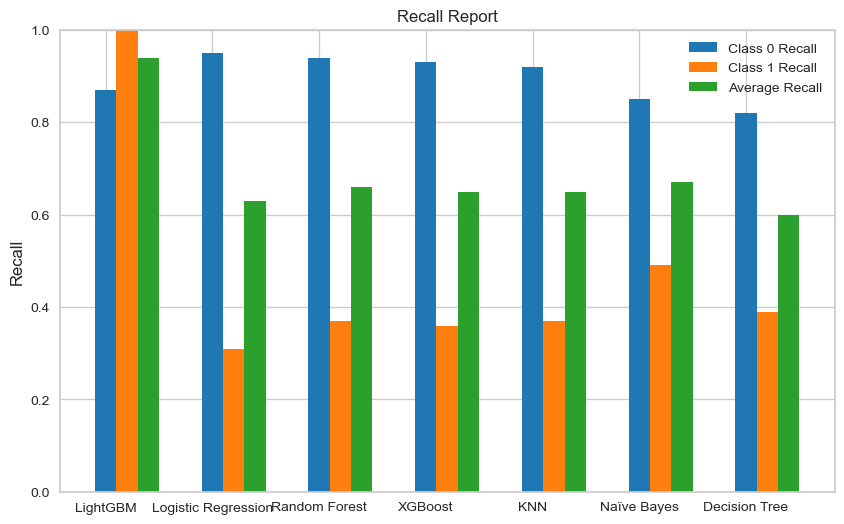

In [174]:
import matplotlib.pyplot as plt

models = ['LightGBM', 'Logistic Regression', 'Random Forest', 'XGBoost', 'KNN', 'Naïve Bayes', 'Decision Tree']
class0_recall = [0.87, 0.95, 0.94, 0.93, 0.92, 0.85, 0.82]
class1_recall = [1.00, 0.31, 0.37, 0.36, 0.37, 0.49, 0.39]
avg_recall = [0.94, 0.63, 0.66, 0.65, 0.65, 0.67, 0.60]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, class0_recall, width=0.2, align='center', label='Class 0 Recall', color='tab:blue')
plt.bar([i + 0.2 for i in x], class1_recall, width=0.2, align='center', label='Class 1 Recall', color='tab:orange')
plt.bar([i + 0.4 for i in x], avg_recall, width=0.2, align='center', label='Average Recall', color='tab:green')

plt.xticks(x, models)
plt.ylabel('Recall')
plt.ylim([0, 1])
plt.title('Recall Report')
plt.legend()
plt.show()


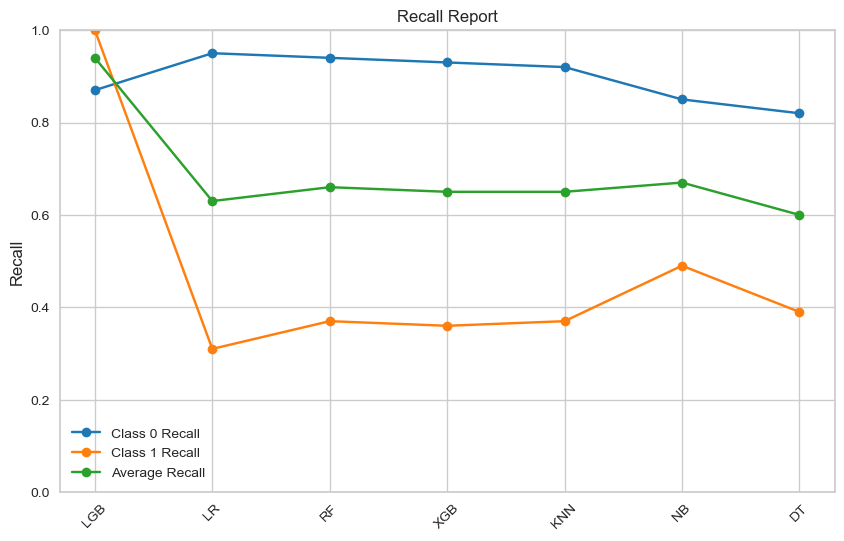

In [176]:
import matplotlib.pyplot as plt

models = ['LGB', 'LR', 'RF', 'XGB', 'KNN', 'NB', 'DT']
class0_recall = [0.87, 0.95, 0.94, 0.93, 0.92, 0.85, 0.82]
class1_recall = [1.00, 0.31, 0.37, 0.36, 0.37, 0.49, 0.39]
avg_recall = [0.94, 0.63, 0.66, 0.65, 0.65, 0.67, 0.60]

plt.figure(figsize=(10, 6))
plt.plot(models, class0_recall, marker='o', label='Class 0 Recall', color='tab:blue')
plt.plot(models, class1_recall, marker='o', label='Class 1 Recall', color='tab:orange')
plt.plot(models, avg_recall, marker='o', label='Average Recall', color='tab:green')

plt.xticks(rotation=45)
plt.ylabel('Recall')
plt.ylim([0, 1])
plt.title('Recall Report')
plt.legend()
plt.show()


In [178]:
               Model  Class 0 F1-Score  Class 1 F1-Score  Average F1-Score
           LightGBM               0.93              0.91             0.920
Logistic Regression               0.89              0.42             0.655
      Random Forest               0.89              0.46             0.675
            XGBoost               0.88              0.45             0.665
                KNN               0.88              0.45             0.665
        Naïve Bayes               0.85              0.49             0.670
      Decision Tree               0.82              0.38             0.600


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

In [183]:
models = ['LightGBM', 'Logistic Regression', 'Random Forest', 'XGBoost', 'KNN', 'Naïve Bayes', 'Decision Tree']
class0_f1 = [0.93, 0.89, 0.89, 0.88, 0.88, 0.85, 0.82]
class1_f1 = [0.91, 0.42, 0.46, 0.45, 0.45, 0.49, 0.38]
avg_f1 = [0.920, 0.655, 0.675, 0.665, 0.665, 0.670, 0.600]

# Print the report in the requested format
print('F1-Score Report')
print('===================================')
print("{:<25} {:<18} {:<18} {:<18}".format("Model", "Class 0 F1-Score", "Class 1 F1-Score", "Average F1-Score"))
for i in range(len(models)):
    print("{:<25} {:<18.2f} {:<18.2f} {:<18.2f}".format(models[i], class0_f1[i], class1_f1[i], avg_f1[i]))


F1-Score Report
Model                     Class 0 F1-Score   Class 1 F1-Score   Average F1-Score  
LightGBM                  0.93               0.91               0.92              
Logistic Regression       0.89               0.42               0.66              
Random Forest             0.89               0.46               0.68              
XGBoost                   0.88               0.45               0.67              
KNN                       0.88               0.45               0.67              
Naïve Bayes               0.85               0.49               0.67              
Decision Tree             0.82               0.38               0.60              


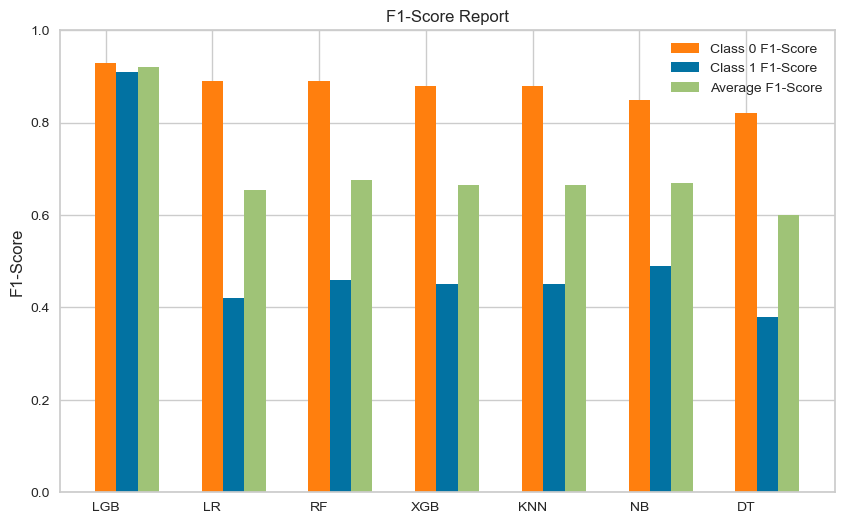

In [184]:
import matplotlib.pyplot as plt

models = ['LGB', 'LR', 'RF', 'XGB', 'KNN', 'NB', 'DT'] 
class0_f1 = [0.93, 0.89, 0.89, 0.88, 0.88, 0.85, 0.82]
class1_f1 = [0.91, 0.42, 0.46, 0.45, 0.45, 0.49, 0.38]
avg_f1 = [0.920, 0.655, 0.675, 0.665, 0.665, 0.670, 0.600]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, class0_f1, width=0.2, align='center', label='Class 0 F1-Score', color='tab:orange')
plt.bar([i + 0.2 for i in x], class1_f1, width=0.2, align='center', label='Class 1 F1-Score')
plt.bar([i + 0.4 for i in x], avg_f1, width=0.2, align='center', label='Average F1-Score')

plt.xticks(x, models)
plt.ylabel('F1-Score')
plt.ylim([0, 1])
plt.title('F1-Score Report')
plt.legend()
plt.show()


In [191]:
models = ['LightGBM', 'Logistic Regression', 'Random Forest', 'XGBoost', 'KNN', 'Naïve Bayes', 'Decision Tree']
class0_precision = [1.00, 0.83, 0.84, 0.84, 0.84, 0.86, 0.83]
class1_precision = [0.83, 0.66, 0.63, 0.61, 0.57, 0.49, 0.38]
avg_precision = [0.915, 0.745, 0.735, 0.725, 0.705, 0.675, 0.605]

class0_recall = [0.87, 0.95, 0.94, 0.93, 0.92, 0.85, 0.82]
class1_recall = [1.00, 0.31, 0.37, 0.36, 0.37, 0.49, 0.39]
avg_recall = [0.94, 0.63, 0.66, 0.65, 0.65, 0.67, 0.60]

class0_f1 = [0.93, 0.89, 0.89, 0.88, 0.88, 0.85, 0.82]
class1_f1 = [0.91, 0.42, 0.46, 0.45, 0.45, 0.49, 0.38]
avg_f1 = [0.920, 0.655, 0.675, 0.665, 0.665, 0.670, 0.600]

print("{:<25} {:<18} {:<18} {:<18}".format("Model", "Average Precision", "Average Recall", "Average F1-Score"))
for i in range(len(models)):
    print("{:<25} {:<18.3f} {:<18.3f} {:<18.3f}".format(models[i], avg_precision[i], avg_recall[i], avg_f1[i]))


Model                     Average Precision  Average Recall     Average F1-Score  
LightGBM                  0.915              0.940              0.920             
Logistic Regression       0.745              0.630              0.655             
Random Forest             0.735              0.660              0.675             
XGBoost                   0.725              0.650              0.665             
KNN                       0.705              0.650              0.665             
Naïve Bayes               0.675              0.670              0.670             
Decision Tree             0.605              0.600              0.600             


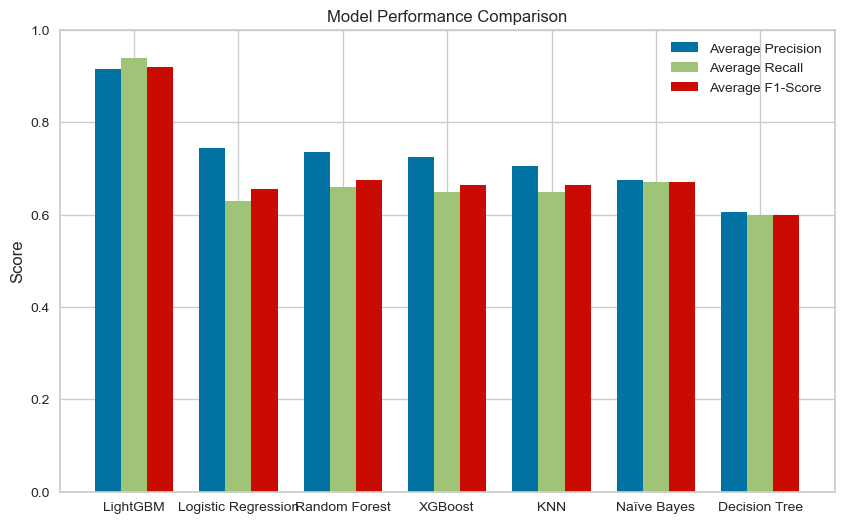

In [192]:
import numpy as np
import matplotlib.pyplot as plt

models = ['LightGBM', 'Logistic Regression', 'Random Forest', 'XGBoost', 'KNN', 'Naïve Bayes', 'Decision Tree']
avg_precision = [0.915, 0.745, 0.735, 0.725, 0.705, 0.675, 0.605]
avg_recall = [0.940, 0.630, 0.660, 0.650, 0.650, 0.670, 0.600]
avg_f1 = [0.920, 0.655, 0.675, 0.665, 0.665, 0.670, 0.600]

x = np.arange(len(models))
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x, avg_precision, width=bar_width, align='center', label='Average Precision')
plt.bar(x + bar_width, avg_recall, width=bar_width, align='center', label='Average Recall')
plt.bar(x + bar_width * 2, avg_f1, width=bar_width, align='center', label='Average F1-Score')

plt.xticks(x + bar_width, models)
plt.ylabel('Score')
plt.ylim([0, 1])
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


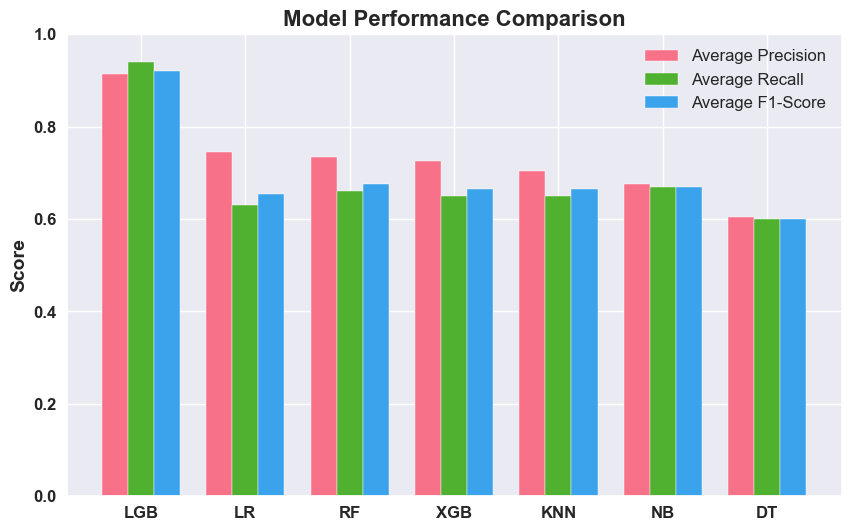

In [194]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('darkgrid')

models = ['LGB', 'LR', 'RF', 'XGB', 'KNN', 'NB', 'DT']
avg_precision = [0.915, 0.745, 0.735, 0.725, 0.705, 0.675, 0.605]
avg_recall = [0.940, 0.630, 0.660, 0.650, 0.650, 0.670, 0.600]
avg_f1 = [0.920, 0.655, 0.675, 0.665, 0.665, 0.670, 0.600]

# Set color palette
colors = sns.color_palette('husl', n_colors=3)

x = np.arange(len(models))
bar_width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x, avg_precision, width=bar_width, align='center', label='Average Precision', color=colors[0])
plt.bar(x + bar_width, avg_recall, width=bar_width, align='center', label='Average Recall', color=colors[1])
plt.bar(x + bar_width * 2, avg_f1, width=bar_width, align='center', label='Average F1-Score', color=colors[2])

plt.xticks(x + bar_width, models, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.ylabel('Score', fontsize=14, fontweight='bold')
plt.ylim([0, 1])
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.show()


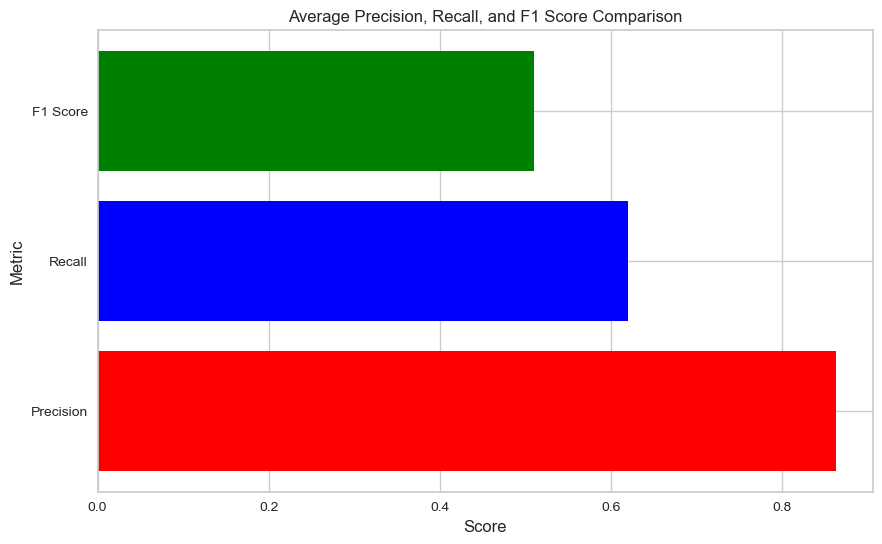

Average Metrics Report
Precision    0.862857
Recall       0.620000
F1 Score     0.510000


In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define precision, recall, and F1 score data
precision = [0.86, 0.83, 0.84, 0.83, 0.84, 0.84, 1.00]
recall = [0.49, 0.66, 0.57, 0.38, 0.63, 0.61, 1.00]
f1_score = [0.49, 0.42, 0.45, 0.38, 0.46, 0.45, 0.92]

# Define model names
model_names = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# Create a DataFrame with the precision, recall, and F1 score data
df_metrics = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1_score}, index=model_names)

# Compute the average precision, recall, and F1 score across all models
avg_metrics = df_metrics.mean()

# Create a horizontal bar plot of the average precision, recall, and F1 score
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red', 'blue', 'green']
ax.barh(avg_metrics.index, avg_metrics.values, color=colors)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title('Average Precision, Recall, and F1 Score Comparison')
plt.show()

# Create a report of the average precision, recall, and F1 score for each model
print('Average Metrics Report\n' + '='*60)
print(avg_metrics.to_string())
